# Investigating Netflix Movies

<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [2]:
# Start coding here! Use as many cells as you like
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [3]:
# Filter the data for movies released in the 1990s
movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_1990s_movies = movies[(movies['release_year'] >= 1990) & (movies['release_year'] < 2000)]
netflix_1990s_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


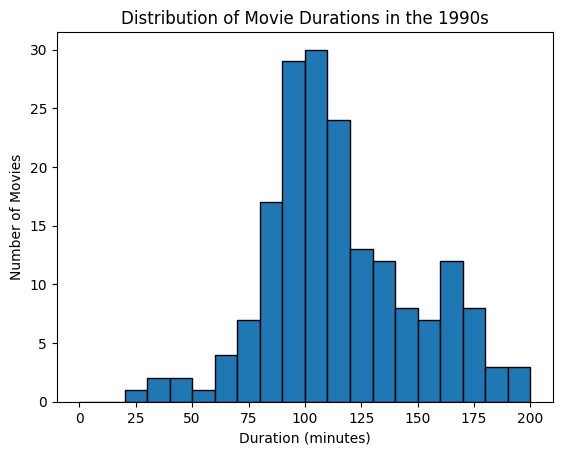

The most frequent movie duration in the 1990s is: 94 minutes


In [4]:
# Find the most frequent movie duration
plt.clf()
plt.hist(netflix_1990s_movies['duration'], bins=np.arange(0, netflix_1990s_movies['duration'].max() + 10, 10), edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

# Most frequent movie duration
duration = int(netflix_1990s_movies['duration'].mode()[0])
print(f"The most frequent movie duration in the 1990s is: {duration} minutes")

In [5]:
# Count the number of short action movies from the 1990s
action_movies_1990s = netflix_1990s_movies[netflix_1990s_movies['genre'].fillna('').str.lower() == 'action']

short_movie_count = 0
for lab, row in action_movies_1990s.iterrows():
    if row["duration"] < 90:
        short_movie_count += 1

print(f"The number of short action movies from the 1990s is: {short_movie_count}")

The number of short action movies from the 1990s is: 7
